# Tarea 2
La tarea consiste, de una forma resumida, en el trabajo y análisis de filtros aplicados a imagenes.

Anteriormente trabajamos con operaciones a nivel de pixel, las cuales eran aplicadas a un pixel y no importaba las caracteristicas de pixeles vecinos.

Un filtro también es una operación (de cierta forma, aunque formalmente decimos que es una función) que se le aplica a un pixel, sin embargo, este si depende de ciertos pixeles vecinos/cercanos.

### Problema 1
Los filtros a crear son:
$$ 
\text{Filtro 1} = \left(\begin{matrix}
0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0\\
1/5 & 1/5 & 1/5 & 1/5 & 1/5\\
0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0
\end{matrix}\right) \quad\quad :\quad\text{dim(Filtro 1)}=5\times5
$$
$$ 
\text{Filtro 2} = \left(\begin{matrix}
0 & 0 & \cdots & 0 & 0\\
0 & 0 & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & \cdots & 0 & 0\\
1/45 & 1/45 & \cdots & 1/45 & 1/45\\
0 & 0 & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & \cdots & 0 & 0\\
0 & 0 & \cdots & 0 & 0
\end{matrix}\right)\quad\quad :\quad\text{dim(Filtro 2)}=45\times45
$$

A pura vista, podemos ver que este filtro afecta principalmente en una zona horizontal. Además, parece ser una especie de promedio entre los k vecinos proximos en la misma fila.

Recordando un poco las clases, nosotros jugamos un poco con el filtro de caja (usando un promedio), y vimos que promediabamos a los veciones mas cercanos del pixel actual (en total fueron 8 los que eran frontera con este), y lo que nos producia era un blur en la imagen.

El Blur se debe a ya que como estamos promediando las intensidades de los pixeles, estas tienen una menor varianza y los colores se parezcan más.

Con el filtro 1 de esta imagen esperamos que se produzca un blur, probablemente no tan intenso, ya que solo toma a consideración los 4 vecinos más cercanos del pixel actual.

Sin embargo, el filtro 2 tienda a promediar muchos más pixeles, por lo que el Blur debería notarse de una mejor forma.

### Filtro extra : Filtro vertical
En nuestro trabajo agregamos un tercer filtro a esta parte que tiene caracteristicas similares, simplemente para ver que pasaba, se puede omitir en la revisión de tarea.

El filtro corresponde a una versión vertical:
$$ 
\text{Filtro 3} = \left(\begin{matrix}
0 & \cdots & 1/45 & \cdots & 0\\
0 & \cdots & 1/45 & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & \cdots & 1/45 & \cdots & 0\\
0 & \cdots & 1/45 & \cdots & 0\\
\end{matrix}\right)\quad\quad :\quad\text{dim(Filtro 3)}=45\times45
$$

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Primero creamos los filtros necesarios:

In [52]:
filter_1 = np.zeros((5,5),np.float32)
filter_1[2,:] = 1.0/5

filter_2 = np.zeros((45,45),np.float32)
filter_2[23,:] = 1.0/45

filter_3 = np.zeros((45,45),np.float32)
filter_3[:,23] = 1.0/45


In [54]:
print(filter_3[0,23])

0.022222223


Ahora que tenemos los filtros que usaremos, los aplicamos:

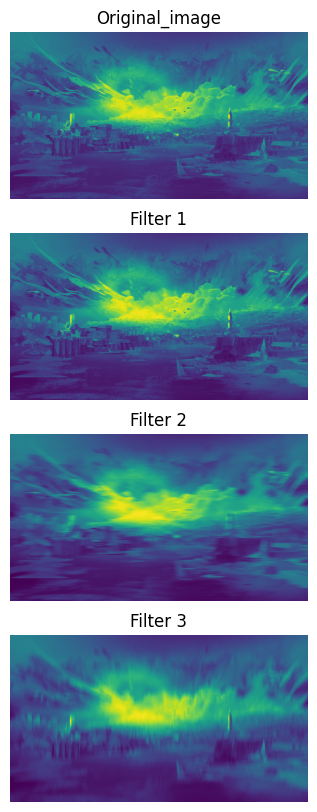

In [55]:
image = cv.imread("elysium.jpg",cv.IMREAD_GRAYSCALE)

filtered_image1 = cv.filter2D(image,ddepth=-1,kernel=filter_1)
filtered_image2 = cv.filter2D(image,ddepth=-1,kernel=filter_2)
filtered_image3 = cv.filter2D(image,ddepth=-1,kernel=filter_3)

plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.imshow(image)
plt.title('Original_image')
plt.axis('off')

plt.subplot(4,1,2)
plt.imshow(filtered_image1)
plt.title('Filter 1')
plt.axis('off')

plt.subplot(4,1,3)
plt.imshow(filtered_image2)
plt.title('Filter 2')
plt.axis('off')

plt.subplot(4,1,4)
plt.imshow(filtered_image3)
plt.title('Filter 3')
plt.axis('off')

plt.show()

### Análizando una sección de la imagen
Para realizar este análisis, tomare una sub imagen o **patch**, la cuál nos permitirá ver más de cerca lo que ocurre con el filtro en los edificios

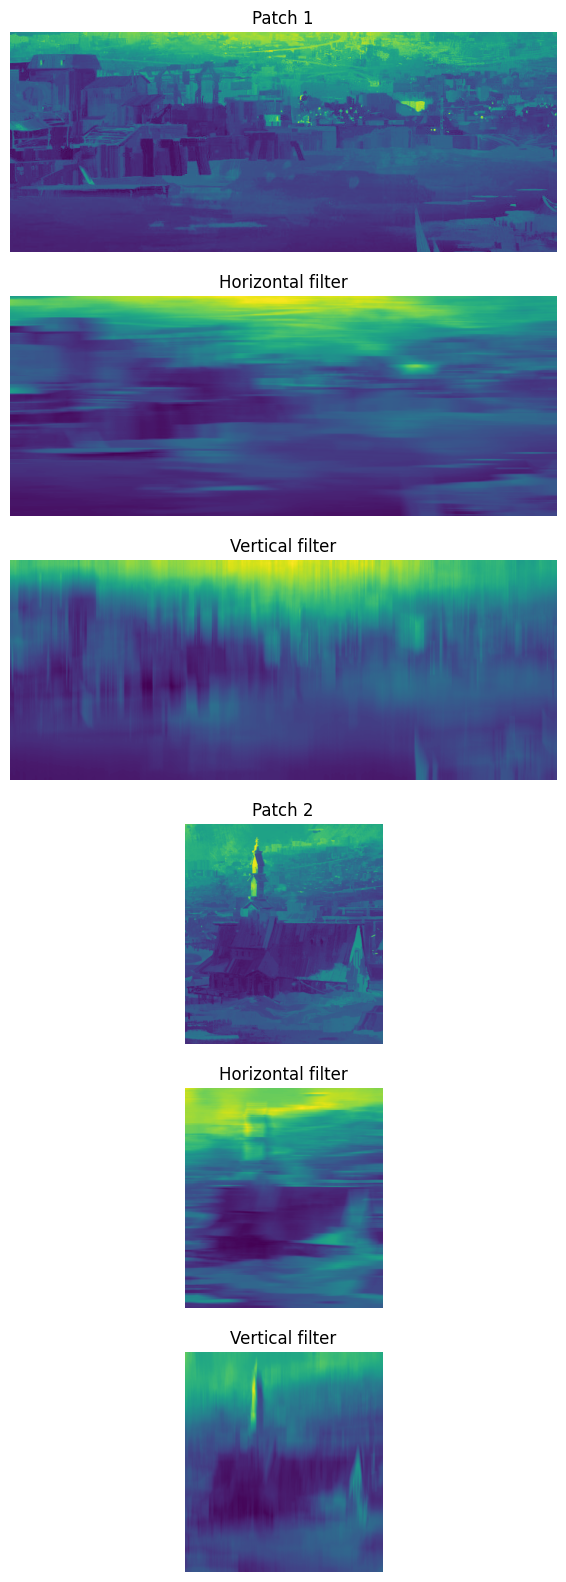

In [95]:
image.shape
#               F_i:F_f, C_i:C_f
patch1 = image[570:860,540:1260]
patch2 = image[460:940,1260:1690]

filtered_patch1_h = cv.filter2D(patch1,ddepth=-1,kernel=filter_2)
filtered_patch1_v = cv.filter2D(patch1,ddepth=-1,kernel=filter_3)

filtered_patch2_h = cv.filter2D(patch2,ddepth=-1,kernel=filter_2)
filtered_patch2_v = cv.filter2D(patch2,ddepth=-1,kernel=filter_3)

plt.figure(figsize=(40,20))

plt.subplot(6,1,1)
plt.imshow(patch1)
plt.title('Patch 1')
plt.axis('off')

plt.subplot(6,1,2)
plt.imshow(filtered_patch1_h)
plt.title('Horizontal filter')
plt.axis('off')

plt.subplot(6,1,3)
plt.imshow(filtered_patch1_v)
plt.title('Vertical filter')
plt.axis('off')

plt.subplot(6,1,4)
plt.imshow(patch2)
plt.title('Patch 2')
plt.axis('off')

plt.subplot(6,1,5)
plt.imshow(filtered_patch2_h)
plt.title('Horizontal filter')
plt.axis('off')

plt.subplot(6,1,6)
plt.imshow(filtered_patch2_v)
plt.title('Vertical filter')
plt.axis('off')

plt.show()